# Seamount Demo Walkthrough
Run `pixi run experiment setups/seamount_demo` and `pixi run harvest` before executing this notebook so `outputs/seamount_demo/` contains NetCDF outputs.

In [1]:
import pathlib
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_mfdataset("../outputs/seamount_demo/seamountA_1.tsout*.nc", combine="by_coords")
ds

/var/folders/w1/m9mm9h9167z_gcfzfffr0rgsh6j6kj/T/ipykernel_87054/219149005.py:1: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds = xr.open_mfdataset("../outputs/seamount_demo/seamountA_1.tsout*.nc", combine="by_coords")


<xarray.Dataset> Size: 2MB
Dimensions:  (y: 50, x: 50, time: 2, z: 25)
Coordinates:
  * y        (y) float32 200B 3.2e+03 9.6e+03 1.6e+04 ... 3.104e+05 3.168e+05
  * x        (x) float32 200B 3.2e+03 9.6e+03 1.6e+04 ... 3.104e+05 3.168e+05
  * time     (time) datetime64[ns] 16B 2001-01-01 2001-01-01T12:00:00
Dimensions without coordinates: z
Data variables:
    depth    (y, x) float32 10kB dask.array<chunksize=(50, 50), meta=np.ndarray>
    umvel    (time, y, x) float32 20kB dask.array<chunksize=(2, 50, 50), meta=np.ndarray>
    vmvel    (time, y, x) float32 20kB dask.array<chunksize=(2, 50, 50), meta=np.ndarray>
    zeta     (time, y, x) float32 20kB dask.array<chunksize=(2, 50, 50), meta=np.ndarray>
    zmean    (z, y, x) float32 250kB dask.array<chunksize=(25, 50, 50), meta=np.ndarray>
    uvel     (time, z, y, x) float32 500kB dask.array<chunksize=(2, 25, 50, 50), meta=np.ndarray>
    vvel     (time, z, y, x) float32 500kB dask.array<chunksize=(2, 25, 50, 50), meta=np.ndarray>
    wphys    (time, z, y, x) float32 500kB dask.array<chunksize=(2, 25, 50, 50), meta=np.ndarray>
    temp     (time, z, y, x) float32 500kB dask.array<chunksize=(2, 25, 50, 50), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        Time series data: seamountA
    history:      created 2026-02-23 16:32:26
    institution:  RBINS – Operational Directorate Natural Environment
    source:       Coherens version V2.12.2
    netcdf:       4.9.0 of Aug  7 2022 23:34:27 $
    _FillValue:   9.96921e+36

## Temperature average

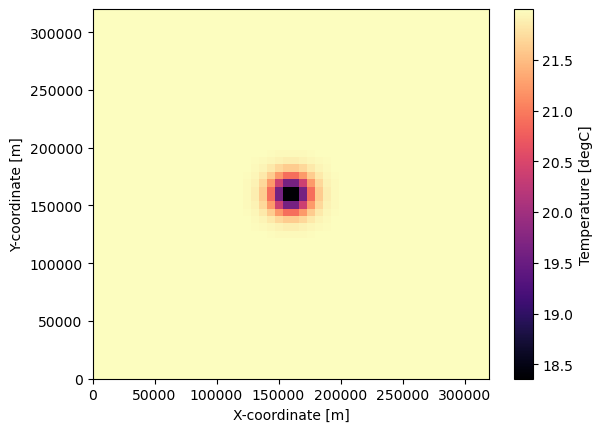

In [3]:
temp_ave = ds['temp'].mean(dim='time')
temp_ave.isel(z=0).plot(x='x', y='y', cmap='magma')